In [45]:
# https://www.kaggle.com/code/harsh221upadhyay/sports-car-data-cleaning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('sport_car_price.csv')
df.head(5)

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [47]:
df.shape

(1007, 8)

In [48]:
df.isnull().sum()

Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64

#### Data has little amount of nulls

In [49]:
df['Car Make'].value_counts()[:10]

Car Make
Porsche          88
McLaren          75
Audi             71
Lamborghini      66
BMW              63
Chevrolet        60
Ferrari          55
Mercedes-Benz    54
Aston Martin     50
Ford             48
Name: count, dtype: int64

#### Looking at newer cars

In [50]:
# Newer Cars
df.sort_values(by=['Year'], ascending=False).head(10)

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
567,Chevrolet,Corvette Z06,2023,5.5,625,650,2.6,"85,000"
638,Nissan,400Z,2023,3,400,350,4,"40,000"
364,Tesla,Roadster,2023,Electric,"1,000+",737,< 1.9,"200,000"
0,Porsche,911,2022,3,379,331,4,"101,200"
359,Jaguar,F-Type R,2022,5,575,516,3.5,"103,200"
770,Porsche,718 Boxster,2022,2,300,280,4.9,"63,000"
376,Bugatti,Chiron,2022,8,1500,1180,2.4,"3,000,000"
772,Ferrari,SF90 Stradale,2022,4,986,590,2.5,"625,000"
773,Audi,TT RS Coupe,2022,2.5,394,354,3.5,"68,000"
775,BMW,Z4 Roadster,2022,2,255,295,5.2,"50,000"


#### Looking at older cars, Here we can see that the dataset has only has one car before the year 2014. This is a huge limitation

In [51]:
# Vintage Cars
df.sort_values(by=['Year'], ascending=True).head(10)

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
170,Shelby,Cobra,1965,7,435,440,4.2,"1,000,000"
273,Mercedes-Benz,SLS AMG Black Series,2014,6.2,622,468,3.5,"275,000"
544,Mercedes-Benz,SLS AMG Black Series,2014,6.2,622,468,3.5,"275,000"
651,Mercedes-Benz,SLS AMG,2015,6.2,583,479,3.6,"221,580"
464,Mercedes-Benz,SLS AMG,2015,6.2,622,468,3.6,"229,000"
181,Mercedes-Benz,SLS AMG,2015,6.2,622,468,3.6,"228,000"
776,Mercedes-Benz,SLS AMG,2015,6.2,622,468,3.6,"200,000"
614,Mercedes-Benz,SLS AMG,2015,6.2,622,468,3.5,"228,000"
143,Mercedes-Benz,SLS AMG,2015,6.2,622,468,3.7,"221,580"
33,Mercedes-Benz,SLS AMG,2015,6.2,622,468,3.2,"222,000"


Looking at 0-60 speed

In [78]:
# Newer Cars
df.sort_values(by=['0-60 MPH Time (seconds)'], ascending=True).head(15)

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
439,Rimac,C_Two,2021,Electric,1914,1732,1.8,2400000
387,Rimac,C_Two,2022,NaN,1888,1696,1.8,2400000
1006,Rimac,Nevera,2021,Electric Motor,1888,1696,1.85,2400000
824,Rimac,Nevera,2021,Electric,1914,1696,1.85,2400000
986,Rimac,Nevera,2022,Electric,1914,1696,1.85,2400000
352,Rimac,Nevera,2022,Electric,1914,1696,1.85,2400000
278,Rimac,C_Two,2022,Electric,1914,1732,1.85,2400000
26,Rimac,Nevera,2022,Electric,1914,1696,1.85,2400000
686,Rimac,C_Two,2022,NaN,1914,1696,1.85,2400000
280,Pininfarina,Battista,2022,Electric,1874,1696,1.9,2500000


In [52]:
df['Price (in USD)'] = df['Price (in USD)'].apply(lambda x: x.replace(',', '')).astype(int)

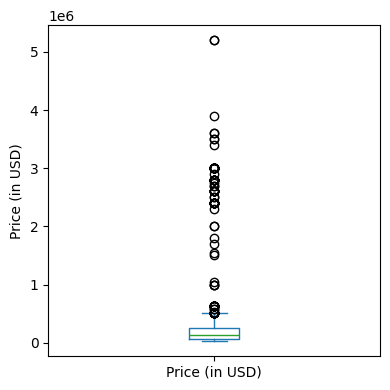

In [74]:
ax = (df['Price (in USD)']).plot.box(figsize=(4, 4))
ax.set_ylabel('Price (in USD)')

plt.tight_layout()
plt.show()

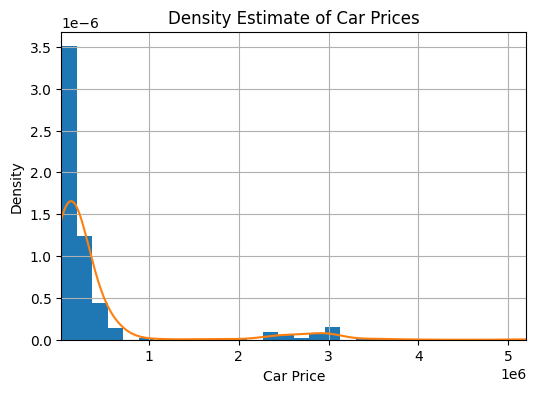

In [72]:
ax = df['Price (in USD)'].plot.hist(density=True, xlim=[25000, 5200000], bins=30, figsize=(6, 4))
df['Price (in USD)'].plot.density(ax=ax) # plotting the density

ax.set_xlabel('Car Price')
ax.set_title('Density Estimate of Car Prices')

plt.grid(True)
plt.show()